In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier

# Load the dataset
data = pd.read_csv('Liver.csv', encoding='latin1')

# Data exploration
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Data preprocessing
# Remove missing values
data.dropna(inplace=True)

# Convert categorical variables to numerical variables
# data['Gender of the patient'] = pd.get_dummies(data['Gender of the patient'], drop_first=True)
data['Result'] = pd.get_dummies(data['Result'], drop_first=True)

# Split the dataset into training and testing sets
X = data.drop(['Result'], axis=1)
y = data['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



   Age of the patient  Total Bilirubin  Direct Bilirubin  \
0                65.0              0.7               0.1   
1                62.0             10.9               5.5   
2                62.0              7.3               4.1   
3                58.0              1.0               0.4   
4                72.0              3.9               2.0   

    Alkphos Alkaline Phosphotase   Sgpt Alamine Aminotransferase  \
0                          187.0                            16.0   
1                          699.0                            64.0   
2                          490.0                            60.0   
3                          182.0                            14.0   
4                          195.0                            27.0   

   Sgot Aspartate Aminotransferase  Total Protiens   ALB Albumin  \
0                             18.0             6.8           3.3   
1                            100.0             7.5           3.2   
2                         

0    19833
1     7833
Name: Result, dtype: int64


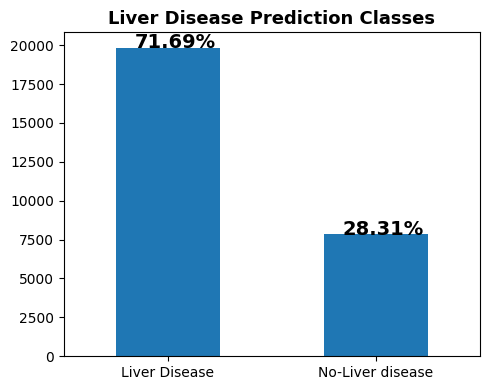

In [ ]:
import matplotlib.pyplot as plt
print(data.Result.value_counts())

fig, ax = plt.subplots(figsize=(5,4))
name = ["Liver Disease", "No-Liver disease"]
ax = data.Result.value_counts().plot(kind='bar')
ax.set_title("Liver Disease Prediction Classes", fontsize=13, weight='bold')
ax.set_xticklabels (name, rotation = 0)

# To calculate the percentage
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-30, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='black', weight = 'bold')
    
plt.tight_layout()

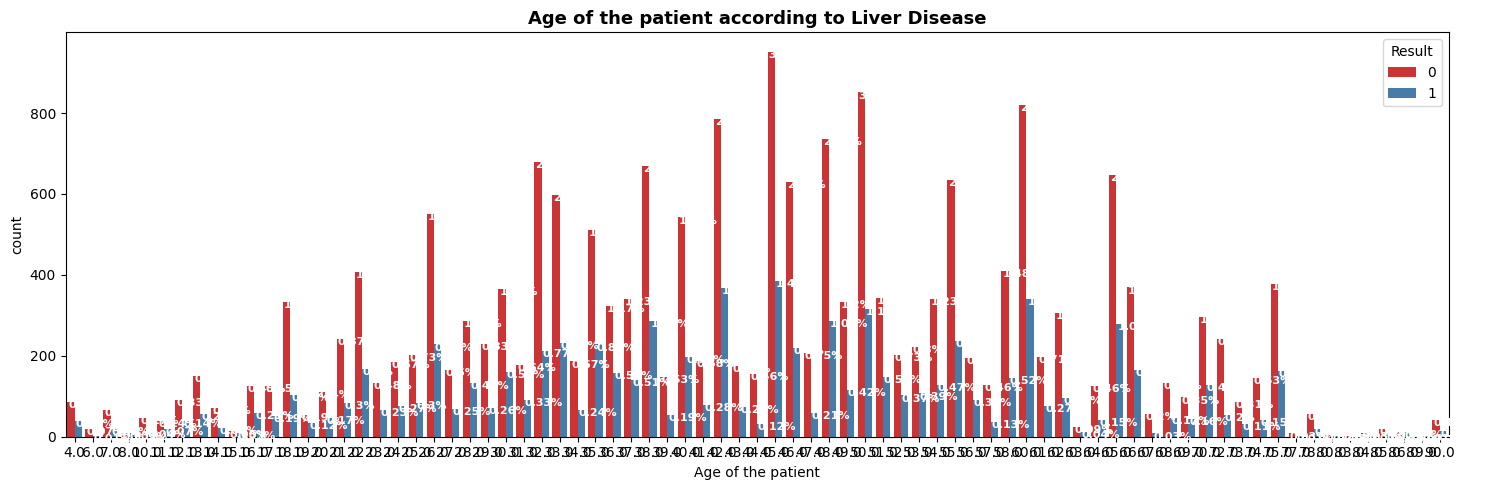

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
name = data['Age of the patient']
ax = sns.countplot(x='Age of the patient', hue='Result', data=data, palette='Set1')
ax.set_title("Age of the patient according to Liver Disease", fontsize = 13, weight = 'bold')

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=8,
                color='white', weight = 'bold')  
plt.tight_layout()